In [1]:
from spectral_clustering import *
from perturbiration_based_tests import *
from sklearn.datasets import make_blobs
import numpy as np

In [2]:
import warnings

warnings.filterwarnings(
    "ignore", message="KMeans is known to have a memory leak on Windows with MKL"
)

In [3]:
random_state = 1

In [4]:
parameter_grid_knn = {
    "sim_graph_type": ["knn"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0],
    "knn": [5, 8, 10, 15, 20, 30, 40],
    "mutual_knn": [0],
    "epsilon": [0],
}

In [5]:
blobs_data, blobs_labels = make_blobs(
    n_samples=[50, 50],
    centers=[[0, 0], [1, 1]],
    cluster_std=[0.5, 0.5],
    random_state=random_state,
)

distance_matrix = get_distance_matrix_from_data(blobs_data)

In [6]:
best_params_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_knn, random_state=random_state
)
print(best_params_knn)

{'K': 1, 'epsilon': 0, 'knn': 40, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}


Text(0.5, 1.0, 'Actual')

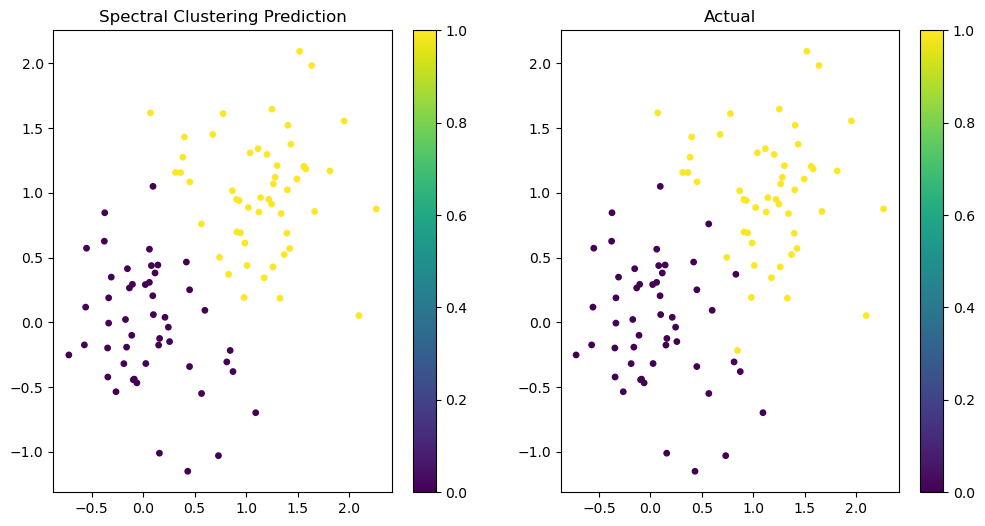

In [ ]:
similarity_matrix_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_knn["sim_graph_type"],
    knn=best_params_knn["knn"],
)

res_knn, eigenvectors_knn, eigenvalues_knn = Spectral_Clustering(
    similarity_matrix_knn,
    K=2,
    random_state=random_state,
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x=blobs_data[:, 0], y=blobs_data[:, 1], c=res_knn.labels_, s=15)
plt.colorbar()
plt.title("Spectral Clustering Prediction")

plt.subplot(1, 2, 2)
plt.scatter(x=blobs_data[:, 0], y=blobs_data[:, 1], c=blobs_labels, s=15)
plt.colorbar()
plt.title("Actual")

c:\Users\Владимир\OneDrive\Documents\Mathematik\Statistical ML\Project\spectral_clustering\spectral_clustering.py:424: ComplexWarning: Casting complex values to real discards the imaginary part
  eigs = np.asarray(eigs, dtype=float)


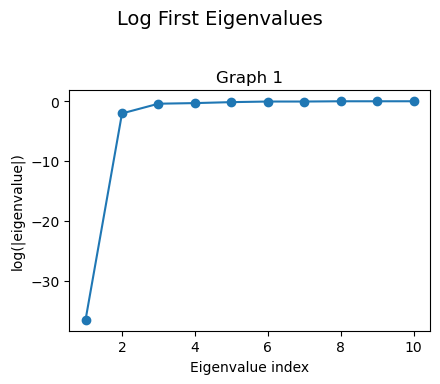

In [ ]:
plot_eigenvalues([eigenvalues_knn])

Let us now add some noise to all data points and see how stable our clustering is

In [ ]:
# TODO: Think about scaling the noise with respect to the standard deviation of the data
noise_std = 2.0

results = run_experiment(
    blobs_data,
    res_knn.labels_,
    best_params_knn,
    n_runs=20,
    noise_std=noise_std,
    K=2,
    seed=random_state,
    return_all=True,
)

Runs: 20, noise_std: 2.0
Mean acc after  matching: 0.6260 ± 0.0632
